In [1]:
# libs
import os
import pandas as pd
import requests
from dotenv import load_dotenv #pip3 install python-dotenv
# pip3 install lxml
import openpyxl
#### sudz4 -> future feature -> try to use xlwings to write to excel

# plotly imports
import plotly.graph_objs as go

# load secrets
load_dotenv()

True

In [2]:
def get_historical_data(symbol, lookback_days=180):
    iex_key = os.getenv("IEX_API_KEY") 
    historical_url = f'https://cloud.iexapis.com/v1/stock/{symbol}/chart/{lookback_days}d?token={iex_key}'

    historical_data = requests.get(historical_url).json()
    df = pd.DataFrame(historical_data)
    return df[['date', 'high', 'low', 'open','close']]

# Fetch historical data
ticker = 'PLTR' # Palantir Technologies Inc
#### sudz4 -> think about getting a list, can do list of SP500 or sector, pass the list to the function and get the data
historical_df = get_historical_data(ticker)

# Display the historical data
# print(historical_df)

# Convert the 'date' column to datetime objects
historical_df['date'] = pd.to_datetime(historical_df['date'])

# Sort the DataFrame by the 'date' column
historical_df = historical_df.sort_values(by='date')

In [3]:
# display historical data info
print()
print('Periods:', len(historical_df))
print('Period Start Date:', historical_df['date'].iloc[0])
print('Period End Date:', historical_df['date'].iloc[-1])
print()

# display historical data partial view
print('Historical Data START')
print(historical_df.head(5))
print()
print('Historical Data END')
print(historical_df.tail(5)) # last 5 rows


Periods: 123
Period Start Date: 2023-08-10 00:00:00
Period End Date: 2024-02-05 00:00:00

Historical Data START
        date    high    low   open  close
0 2023-08-10  15.870  15.25  15.44  15.41
1 2023-08-11  15.580  14.91  15.05  15.41
2 2023-08-14  15.740  14.95  15.20  15.72
3 2023-08-15  15.870  15.29  15.61  15.37
4 2023-08-16  15.725  15.12  15.21  15.45

Historical Data END
          date     high     low   open  close
118 2024-01-30  17.2400  16.660  17.04  16.74
119 2024-01-31  16.7600  16.070  16.41  16.09
120 2024-02-01  16.4868  16.030  16.21  16.33
121 2024-02-02  17.0200  16.145  16.34  17.02
122 2024-02-05  17.8700  16.480  17.56  16.72


In [4]:
# make pandas dataframe setting show all rows and columns
pd.set_option('display.max_rows', None)

#display historical data FULL chart view
# historical_df # uncomment to display full chart view

In [5]:
# Calculate Ichimoku components
high_9 = historical_df['high'].rolling(window=9).max()
low_9 = historical_df['low'].rolling(window=9).min()
historical_df['tenkan_sen'] = (high_9 + low_9) / 2

high_26 = historical_df['high'].rolling(window=26).max()
low_26 = historical_df['low'].rolling(window=26).min()
historical_df['kijun_sen'] = (high_26 + low_26) / 2

historical_df['senkou_span_a'] = ((historical_df['tenkan_sen'] + historical_df['kijun_sen']) / 2).shift(26)

high_52 = historical_df['high'].rolling(window=52).max()
low_52 = historical_df['low'].rolling(window=52).min()
historical_df['senkou_span_b'] = ((high_52 + low_52) / 2).shift(26)

historical_df['chikou_span'] = historical_df['close'].shift(-26)

# print updated df
historical_df

,date,high,low,open,close,tenkan_sen,kijun_sen,senkou_span_a,senkou_span_b,chikou_span
0,2023-08-10,15.8700,15.2500,15.440,15.41,NaN,NaN,NaN,NaN,15.46
1,2023-08-11,15.5800,14.9100,15.050,15.41,NaN,NaN,NaN,NaN,15.15
2,2023-08-14,15.7400,14.9500,15.200,15.72,NaN,NaN,NaN,NaN,14.74
3,2023-08-15,15.8700,15.2900,15.610,15.37,NaN,NaN,NaN,NaN,14.00
4,2023-08-16,15.7250,15.1200,15.210,15.45,NaN,NaN,NaN,NaN,14.13
5,2023-08-17,15.4373,14.0350,15.390,14.15,NaN,NaN,NaN,NaN,14.22
6,2023-08-18,14.6000,13.6800,13.880,14.40,NaN,NaN,NaN,NaN,13.96
7,2023-08-21,14.7800,14.3400,14.420,14.50,NaN,NaN,NaN,NaN,14.85
8,2023-08-22,15.1300,14.6300,14.760,14.67,14.77500,NaN,NaN,NaN,15.77
9,2023-08-23,15.4700,14.4200,14.500,15.30,14.77500,NaN,NaN,NaN,16.00


In [6]:
# save dataframe to .xlsx file
# header is the row with the column names
pd.DataFrame(historical_df).to_excel('/Users/sudz4/Desktop/FINANCIAL-SYSTEMS/dark-trader/ichimoku_cloud/ichimoku_data/PLTR_180d_ichimoku.xlsx', header=True, index=False)

# print success message
print('PLTR_180d_ichimoku.xlsx file saved successfully!')

PLTR_180d_ichimoku.xlsx file saved successfully!


In [7]:
# print column names
print(historical_df.columns.to_list())

['date', 'high', 'low', 'open', 'close', 'tenkan_sen', 'kijun_sen', 'senkou_span_a', 'senkou_span_b', 'chikou_span']


/var/folders/8w/4mj_4m4d0rs1q22bl9g77hhw0000gn/T/ipykernel_29859/2432593813.py:7: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ohlc['date'] = mdates.date2num(ohlc['date'].dt.to_pydatetime())


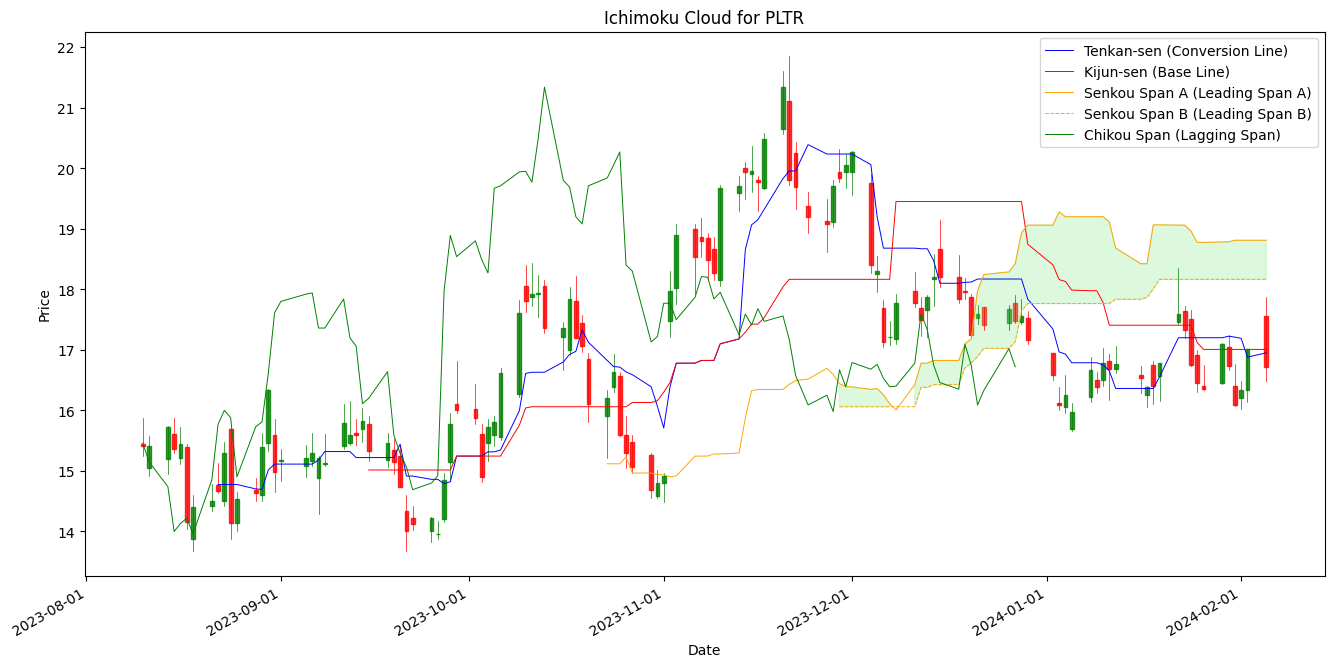

In [8]:
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

# Preparing the data for the candlestick chart
ohlc = historical_df[['date', 'open', 'high', 'low', 'close']].copy()
ohlc['date'] = mdates.date2num(ohlc['date'].dt.to_pydatetime())

# Create a new figure and a subplot with labels
fig, ax = plt.subplots(figsize=(16, 8))

# Plotting the candlestick chart
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Plotting Ichimoku components
ax.plot(historical_df['date'], historical_df['tenkan_sen'], label='Tenkan-sen (Conversion Line)', color='blue', linewidth=0.7)
ax.plot(historical_df['date'], historical_df['kijun_sen'], label='Kijun-sen (Base Line)', color='red', linewidth=0.7)
ax.plot(historical_df['date'], historical_df['senkou_span_a'], label='Senkou Span A (Leading Span A)', color='orange', linewidth=0.7)
ax.plot(historical_df['date'], historical_df['senkou_span_b'], label='Senkou Span B (Leading Span B)', color='orange', linewidth=0.7, linestyle='--')
ax.plot(historical_df['date'], historical_df['chikou_span'], label='Chikou Span (Lagging Span)', color='green', linewidth=0.7)

# Filling the cloud
ax.fill_between(historical_df['date'], historical_df['senkou_span_a'], historical_df['senkou_span_b'], where=historical_df['senkou_span_a'] >= historical_df['senkou_span_b'], color='lightgreen', alpha=0.3)
ax.fill_between(historical_df['date'], historical_df['senkou_span_a'], historical_df['senkou_span_b'], where=historical_df['senkou_span_a'] < historical_df['senkou_span_b'], color='lightcoral', alpha=0.3)

# Formatting the x-axis as dates
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

# Adding labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title(f'Ichimoku Cloud for {ticker}')
ax.legend()

# Show the plot
plt.show()
